# 处理时间序列

3类时间数据：
1. 时间戳：某个具体的时间点
1. 时间间隔和周期：开始时间点与结束时间点之间的时间长度。如2015年指的是2015.1.1到2015.12.31这段时间。
1. 时间增量(time delta)或持续时间(duration)：表示精确的时间长度。例如程序运行时间是22.56秒。

## python的日期与时间工具

标准库和第三方库都有处理时间的工具。pandas的工具虽然更适合数据科学，但是了解其他工具的情况也很有用。

### 原生python的日期与时间工具：datetime和dateutil

标准库中的datetime模块，第三方库的dateutil模块。

使用datetime类型创建一个日期：

In [2]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

dateutil模块对各种字符串格式的日期进行正确解析：

In [3]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

datetime对象，可以做很多操作。

例如打印这一天是星期几：

In [4]:
date.strftime('%A')

'Saturday'

### 时间类型数组：NumPy的datetime64类型

datetime64把日期编码为64位的整数。datetime64需要在设置日期时确定具体的输入类型：

In [6]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

这个日期的格式可以快速向量化计算：

In [8]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

NumPy会自动判断输入时间需要使用的时间单位。

这是一个以天为单位的时间：

In [9]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

这是一个以分钟为单位的日期：

In [10]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

时区会自动设置为操作系统的当地时区。我们可以设置基本时间的单位。

比如，纳秒：

In [11]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

详见NumPy文档。

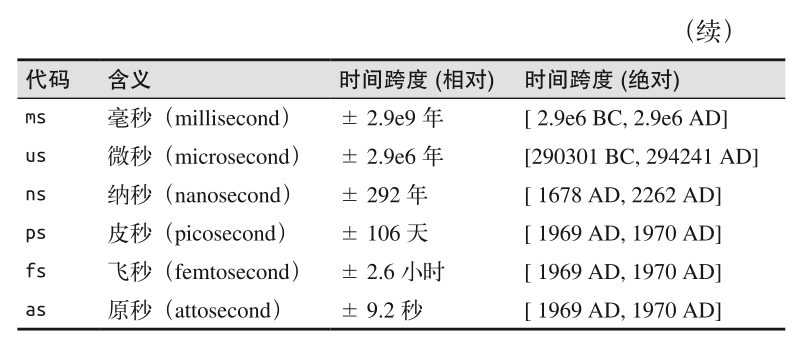

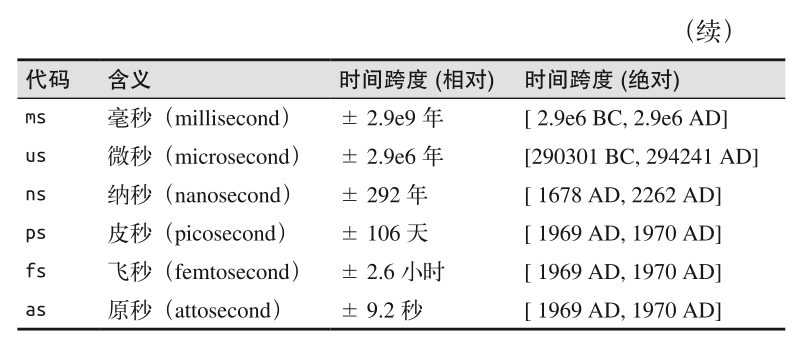

默认单位都用纳秒，因为大部分情况下够用了。

datetime64少了很多datetime原来的便捷方法和函数。

### Pandas的日期与时间工具：理想与现实的最佳解决方案

Timestamp对象实现。

演示：某一天是星期几。

In [12]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Timestamp('2015-07-04 00:00:00')

In [13]:
date.strftime('%A')

'Saturday'

另外，也可以直接进行NumPy类型的向量化运算：

In [14]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas时间序列：用时间作索引

适合处理 **带时间戳的索引数据** 。例如我们可以通过一个时间索引数据创建一个Series对象：

In [15]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

使用日期进行切片取值：

In [17]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

使用年份切片获得一年的数据：

In [18]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas时间序列数据结构

1. 针对时间戳数据：Timestamp类型，对应的索引数据结构是DatetimeIndex。
1. 针对时间周期数据：Period类型，对应的索引数据结构是PeriodIndex。
1. 针对时间增量或者持续时间：Timedelta类型，对应的索引类型是TimedeltaIndex。

最基础的日期对象：Timestamp和DatetimeIndex。

最常用的方法：pd.to_datetime()函数，返回Timestamp类型（输入日期）；返回DatetimeIndex（输入时间序列）。

In [19]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

DatetimeIndex可以通过to_period()方法和一个频率代码转换成PeriodIndex类型。下面用'D'将数据转换成单日的时间序列：

In [20]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

当用一个日期减去另一个日期时，返回的结果是TimedeltaIndex类型：

In [21]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### 有规律的时间序列：pd.date_range()

1. pd.date_range()：处理时间戳
1. pd.period_range()：处理周期
1. pd.timedelta_range()：处理时间间隔

例如，pd.date_range()参数是：开始日期，结束日期，频率（默认是天）。

In [22]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

也可以是开始时间+周期数periods：

In [23]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

freq参数可以改变时间间隔，默认是天D。创建按小时变化的时间戳：

In [24]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

创建一个有规律的周期或者时间间隔序列，有类似的函数pd.period_range()和pd.timedelta_range()。以月为周期的示例：

In [25]:
pd.date_range('2015-07-03', periods=8, freq='M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [26]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [27]:
pd.period_range('2015-07-03', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

可以看到，period最多只能获取月份的时间了。

一个小时递增的序列：

In [28]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [32]:
pd.timedelta_range(0, periods=10, freq='D')

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days',
                '6 days', '7 days', '8 days', '9 days'],
               dtype='timedelta64[ns]', freq='D')

In [33]:
try:
    pd.timedelta_range(0, periods=10, freq='M')
except ValueError as e:
    print(e)

<MonthEnd> is a non-fixed frequency


可以看到，timedelta只能使用天以下的时间间隔了。

## 时间频率与偏移量

时间频率，或者叫偏移量(offset)是pd的时间序列工具的基础。

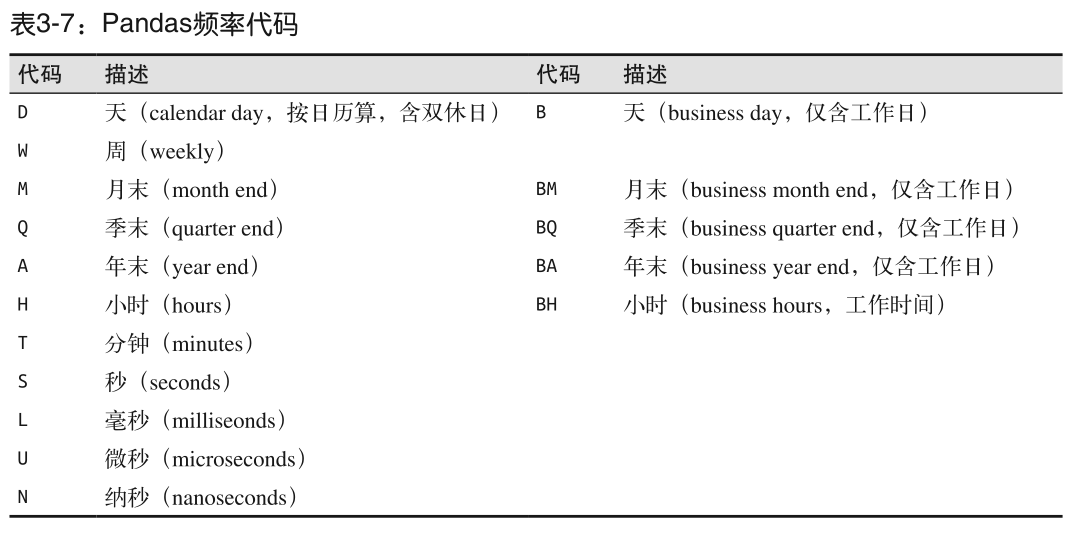

注意，月季年频率是具体周期的结束时间（如年末），末尾带S的表示日期开始。

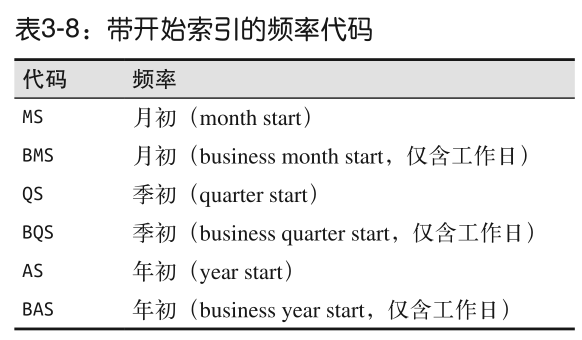

另外，你可以在频率代码后面加三位月份缩写字母来改变季、年频率的开始时间。

同理，也可以在后面加三位星期缩写字母来改变一周的开始时间。

在这些代码的基础上，还可以将频率组合起来创建的新的周期。例如，可以用小时（ H ）
和分钟（ T ）的组合来实现 2 小时 30 分钟：

In [34]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

pd.tseries.offsets模块中有这些频率代码。

例如直接创建一个工作日偏移序列：

In [35]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())


DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## 重新取样、迁移和窗口

专门为时间序列准备的操作。使用股票数据演示这些功能。

导入Google的历史股票价格：

In [51]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


数据有点不太一样。小数点后面最多有6位数。我们使用收盘价：

In [52]:
goog = goog['Close']
goog.head()

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
Name: Close, dtype: float64

使用Matplotlib之后，就可以通过plot()画出可视化图了：

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


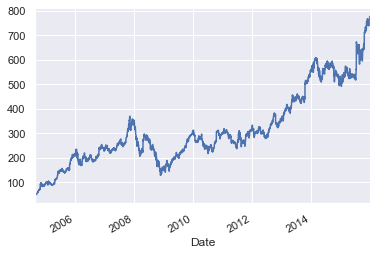

In [54]:
goog.plot()

### 重新取样和频率转换

2种取样方法：
1. resample()：数据累计
1. asfreq()：数据选择

使用2种方法进行向后取样：

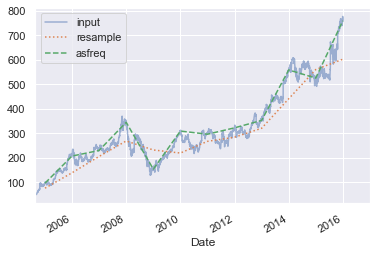

In [56]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc = 'upper left');

2种方法的差异：
1. resample反映的是上一年的均值
1. asfreq反映的是上一年最后一个工作日的收盘价

完全不懂这些取样方法，看维基百科也不能懂。

下面将对工作日数据按天进行重新取样（包括周末），结果如下所示：

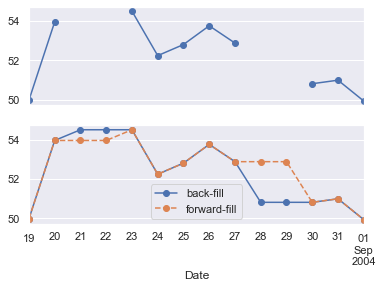

In [57]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')

ax[1].legend(["back-fill", "forward-fill"]);

上面那副是原始数据：非工作日的股价是缺失值，所以不会出现在图上。而下面那副图是通过向前填充和向后填充这两种方法填补了缺失值。

### 时间迁移

对数据按时间进行迁移：
1. shift()：迁移数据
1. tshift()：迁移索引

下面分别用2种方法让数据迁移900天。

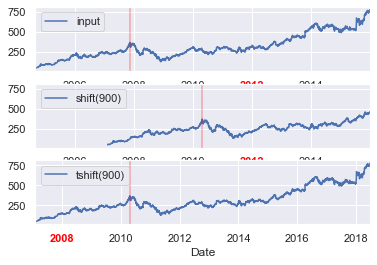

In [59]:
fig, ax = plt.subplots(3, sharey=True)

# 对数据应用时间频率，用向后填充解决缺失值
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# 设置图例与标签
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max+offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max+offset, alpha=0.3, color='red');

效果是一样的，只是展示的方式不一样。这类迁移方法的常见使用场景是计算数据在不同时段的差异。例如，我们可以用迁移后的值计算Google股票一年期的投资汇报率：

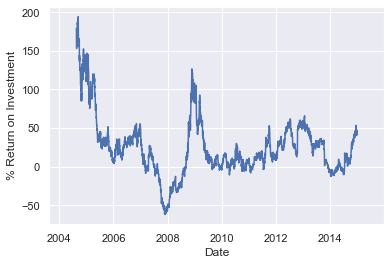

In [60]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### 移动时间窗口

移动统计值。

例如，通过下面的代码获取Google股票收盘价的一年期移动平均值和标准值。

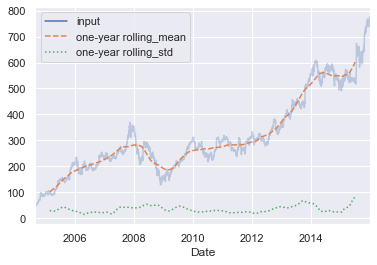

In [61]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## 更多学习资料

 Pandas 在线文档“Time Series / Date”。
 
 《利用 Python 进行数据分析》

## 案例：美国西雅图自行车统计数据的可视化

下载数据集：

使用curl下载速度超级慢，但是直接在浏览器下载就很快。为什么呢？

可能是因为浏览器有科学上网功能吧。

用Pandas读取CSV文件，获得一个DataFrame：

In [2]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('data//Fremont_Bridge_Bicycle_Counter.csv', index_col = 'Date', parse_dates = True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


缩短数据集的列名，新增一个Total列：

In [11]:
data.columns = ['Total', 'East', 'West']

In [12]:
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


统计3列的值：

In [13]:
data.dropna().describe()

,Total,East,West
count,63494.000000,63494.000000,63494.000000
mean,114.315888,52.445648,61.870240
std,145.595300,67.396191,90.635793
min,0.000000,0.000000,0.000000
25%,15.000000,6.000000,7.000000
50%,61.000000,29.000000,30.000000
75%,149.000000,70.000000,74.000000
max,1097.000000,698.000000,850.000000


In [14]:
data.dropna?

#### 数据可视化

显示原始数据：

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

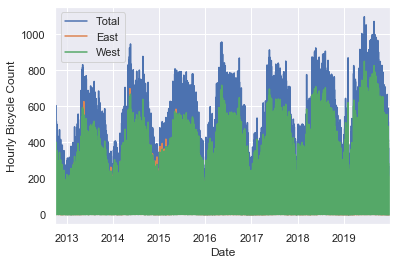

In [19]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

样本数据太多了，重新取样将数据转换成按周累计：

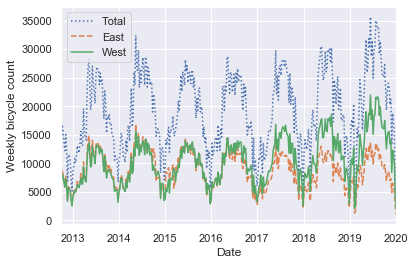

In [20]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

可以看到有些季节特征了。

另一种累计的方法是求移动平均值，下面计算数据的30日移动均值，并让图形在窗口居中显示：

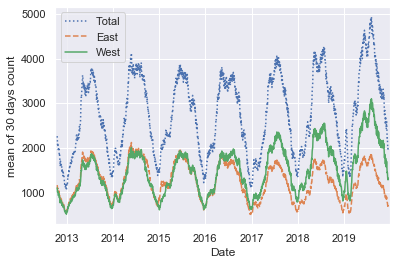

In [21]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'])
plt.ylabel('mean of 30 days count');

使用高斯分布时间窗口。设置窗口的宽度（50天）和窗口内高斯平滑的宽度（选择10天）：

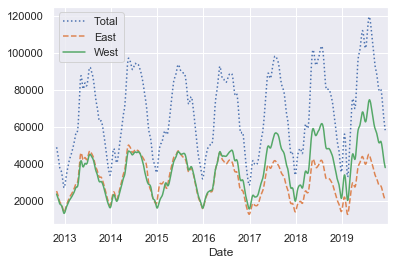

In [22]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

#### 深入挖掘数据

观察单日内的小时均值流量，用GroupBy：

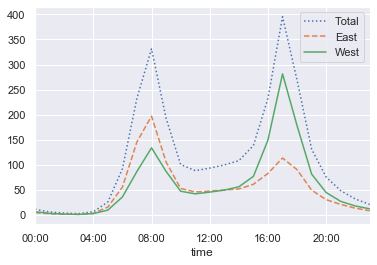

In [23]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

In [26]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

观察周内每天的变化。

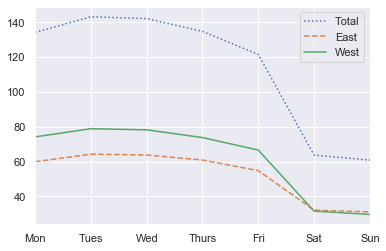

In [27]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

使用复合groupby观察一周的工作日和双休日每小时的数据。

In [28]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


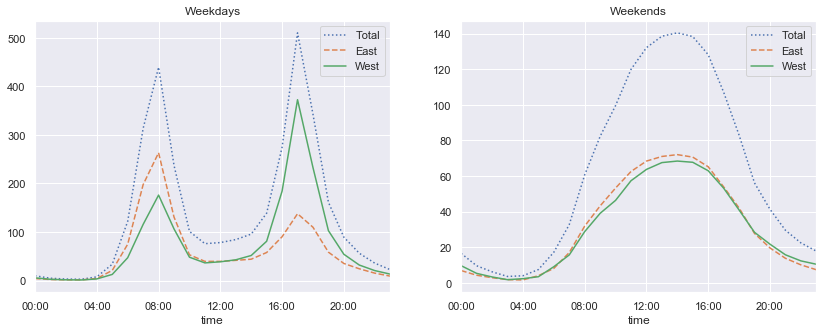

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])

by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-'])

更多内容请看其他参考资料。